In [ ]:
# Copyright 2023, Acadential, All rights reserved.

# 2-8. PyTorch로 구현해보는 Neural Network

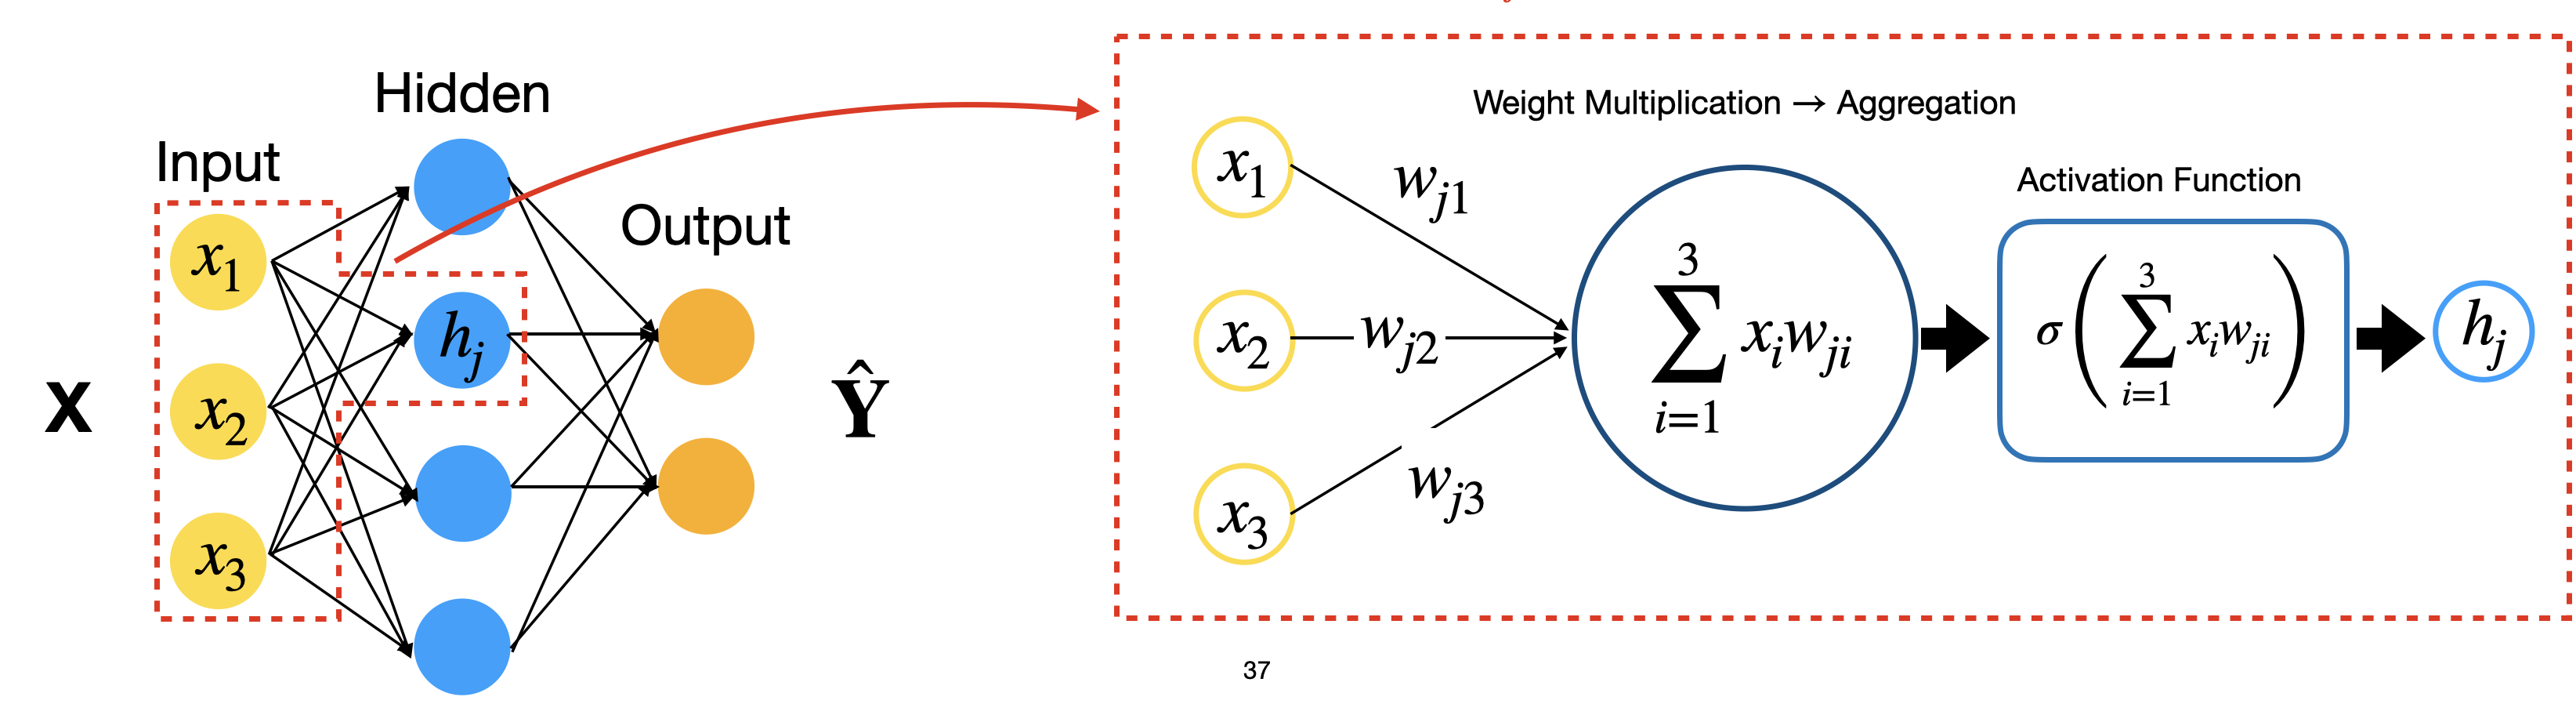

- Neural Network는 크게 3가지의 Layer로 구성되어 있습니다.
    - Input Layer
    - Hidden Layer
    - Output Layer
- Hidden Layer는 
    - 보통 여러개의 Layer로 구성되어 있습니다.
    - 각 Layer는 여러개의 Node로 구성되어 있고,
    - 각 Node는 Weight와 Bias를 가지고 있습니다.
    - Weight와 Bias가 적용된 값은 Activation Function을 통과합니다.
- Activation Function으로는  (Section 7 Activation Function에서 자세히 다룰 예정입니다.)
    - Sigmoid
    - Tanh
    - ReLU
    - Softmax 함수들이 있습니다.
- Neural Network의 마지막 Output Layer는 보통 Classification을 위한 Softmax 함수를 거칩니다.



# PyTorch 라이브러리 import 하기

In [2]:
import torch 

# 입력값 정의하기

Mini batch size가 32이고 feature 크기 (차원의 크기)가 128인 랜덤한 입력값을 정의해보겠습니다.

## Mini-batch란?

Mini batch에 대해서는 "Section 6 경사 하강 심화 이론의 Mini-batch Gradient Descent"에서 자세하게 다루게 됩니다.

지금은 입력값이 여러 데이터의 묶음, 뭉치 (mini-batch)로 구성되어 있고, 하나의 데이터 묶음을 구성하는 데이터 개수가 batch size라고 이해하시면 되겠습니다.


In [3]:
batch_size=32  # mini-batch의 크기
feature_size=128
x = torch.rand(batch_size, feature_size)

In [4]:
print(x)

tensor([[0.9842, 0.6745, 0.8330,  ..., 0.3399, 0.5930, 0.5564],
        [0.8983, 0.4037, 0.9726,  ..., 0.4573, 0.0846, 0.8068],
        [0.0402, 0.9166, 0.3561,  ..., 0.2835, 0.6627, 0.0851],
        ...,
        [0.7480, 0.4730, 0.0753,  ..., 0.1236, 0.6738, 0.8934],
        [0.2157, 0.1954, 0.6804,  ..., 0.0896, 0.7897, 0.0956],
        [0.8837, 0.0094, 0.4672,  ..., 0.7699, 0.5154, 0.6099]])


In [5]:
x.shape

torch.Size([32, 128])

# Fully Connected NN Layer (```torch.nn.Linear```)

Fully connected layer (dense layer 혹은 feedforward layer)은 ```torch.nn.Linear```으로 구현되어 있습니다.

```torch.nn.Linear(in_features=in_features, out_features=out_features,bias=True)```
으로 

- ```in_features```: 이전 Layer에서 Node 개수 (입력되는 feature의 차원수)
- ```out_features```: 현 Layer의 Node 개수 (출력되는 feature의 차원수)
- ```bias```: bias 항을 사용할 것인지 정의

클라스의 이름이 ```Linear```라는 것으로 유추할 수 있다시피, FC Layer은 Weight 행렬에 대한 곱 더하기 Bias을 적용한 것입니다.

```W @ X + b```


In [6]:
# Initialize FC Layer
in_features = 128 
out_features = 64
layer_1 = torch.nn.Linear(in_features=in_features,
                         out_features=out_features,
                         bias=True)


In [32]:
# layer_1의 weight, bias
layer_1.weight.shape

torch.Size([64, 128])

In [31]:
layer_1.bias.shape

torch.Size([64])

In [17]:
# layer_1의 forward pass
x = torch.rand(8, 128)
output1 = layer_1(x)

In [19]:
# Weight 곱하기 X 더하기 Bias
output2 = x @ layer_1.weight.T + layer_1.bias

In [34]:
# 두 값이 같은 것을 확인할 수 있다!
print(output1[0][1])
print(output2[0][1])

tensor(0.4426, grad_fn=<SelectBackward0>)
tensor(0.4426, grad_fn=<SelectBackward0>)


# Activation Function

흔히 사용되는 Activation function (활성화 함수)의 종류는 크게 다음과 같습니다:
- Sigmoid: ```torch.nn.Sigmoid```
- Tanh: ```torch.nn.Tanh```
- Relu: ```torch.nn.ReLU```
- Softmax: ```torch.nn.Softmax```


In [5]:
# Sigmoid
x = torch.rand(8, 128)

act_fn = torch.nn.Sigmoid()  # Sigmoid 객체 생성

out = act_fn(x)
out.shape

torch.Size([8, 128])

In [6]:
# Tanh
x = torch.rand(8, 128)

act_fn = torch.nn.Tanh()  # Tanh 객체 생성

out = act_fn(x)
out.shape

torch.Size([8, 128])

In [7]:
# ReLU
x = torch.rand(8, 128)

act_fn = torch.nn.ReLU()  # ReLU 객체 생성

out = act_fn(x)
out.shape

torch.Size([8, 128])

In [53]:
# Softmax
logits = torch.rand(1, 20)

softmax = torch.nn.Softmax(dim=1)  # Softmax 객체 생성
pred_probab = softmax(logits)  

out = act_fn(x)
out.shape

torch.Size([8, 128])

In [54]:
print("Sum of logits = ", torch.sum(logits, dim=1).item())
print("Sum of softmaxed logits = ", torch.sum(pred_probab, dim=1).item())

Sum of logits =  8.1754150390625
Sum of softmaxed logits =  1.0000001192092896


# Fully Connected Neural Network

아주 간단한 Fully Connected Neural Network를 구현해보겠습니다.

In [8]:
# First layer
# Feature vector을 128 -> 64로 변환하는 Layer
# FC Layer + Tanh으로 구성
in_features = 128 
out_features = 64
layer_1 = torch.nn.Linear(in_features=in_features,
                         out_features=out_features,
                         bias=True)

# Activation 함수
act_fn_1 = torch.nn.Tanh()

In [9]:
# Second Layer
# Feature vector을 64 -> 16로 변환하는 Layer
# FC Layer + Tanh으로 구성
in_features = 64
out_features = 16
layer_2 = torch.nn.Linear(in_features=in_features,
                         out_features=out_features,
                         bias=True)
act_fn_2 = torch.nn.Tanh()


In [10]:
# Third Layer
# Feature vector을 16 -> 1로 변환하는 Layer
# FC Layer + Sigmoid으로 구성

in_features = 16
out_features = 1
layer_3 = torch.nn.Linear(in_features=in_features,
                         out_features=out_features,
                         bias=True)
act_fn_3 = torch.nn.Sigmoid()


In [11]:
# First layer 통과
out_1 = act_fn_1(layer_1(x))

In [12]:
out_1.shape  # (batch_size, 64)

torch.Size([32, 64])

In [13]:
# Second layer 통과
out_2 = act_fn_2(layer_2(out_1))

In [14]:
out_2.shape  # (batch_size, 16)

torch.Size([32, 16])

In [15]:
# Third layer 통과
out_3 = act_fn_3(layer_3(out_2))

In [16]:
out_3.shape  # (batch_size, 1)

torch.Size([32, 1])

# nn.Sequential

위에서는 각 Layer을 하나 하나씩 Forward pass를 개별적으로 수행했습니다. \
이번에는 ```nn.Sequential```을 이용하여 여러 Layer을 하나의 모델로 만들어보고 한번에 forward pass해보는 방법을 확인해보겠습니다.

```nn.Sequential```은 여러 layer들을 이어붙여서 하나의 모듈로 만드는 역할을 가집니다. \
참고로 Sequential의 input은 List가 아니라 Layer들을 ***풀어서*** 입력해줍니다. (i.e. 인자로 NN Layer, Activation 함수들을 열거해서 입력 받습니다.)

In [24]:
# nn.Sequential
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=128,
                    out_features=64,
                    bias=True),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=64,
                    out_features=16,
                    bias=True),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=16,
                    out_features=1,
                    bias=True),
    torch.nn.Sigmoid()
)

In [25]:
# nn.Sequential의 Forward pass
x = torch.rand(32, 128)  # (batch size, feature size)

out = model(x)

out.shape  # (batch size, output size)

torch.Size([32, 1])

In [26]:
model  # 구조를 확인할 수 있습니다.

Sequential(
  (0): Linear(in_features=128, out_features=64, bias=True)
  (1): Tanh()
  (2): Linear(in_features=64, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

# nn.Module

```nn.Module```을 통해서 신경망 모델을 만들 수 있습니다.


```nn.Module```의 특징을 정리해보자면:
- ```nn.Module```을 상속받은 모든 클래스는 신경망 모듈이 됩니다.
- 신경망 모듈은 GPU로 이동할 수 있고, 내보내기(exporting), 불러오기(loading)가 가능하며, 복합적인 구조를 가질 수 있습니다.
- ```nn.Module```은 또한 ```Parameter```를 포함하고 있는데, 이는 학습 중에 최적화되는 가중치와 편향입니다.

```nn.Module```을 사용하려면 기본적으로 다음 두 ```Method```을 Override 합니다:
1. ```__init__``` : 신경망 모듈에서 사용되는 모든 모듈을 정의합니다.
2. ```forward``` : 신경망 모듈에서 사용되는 모든 모듈의 연산을 정의합니다.

In [29]:
# 기본 구조
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Neural Network을 구성하는 layer들을
        # initialize하는 부분
        pass

    def forward(self, x):
        # Neural Network의 forward pass을 정의하는 부분
        # x은 input tensor
        pass

In [20]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(in_features=128,
                            out_features=64,
                            bias=True),
            torch.nn.Tanh(),
            torch.nn.Linear(in_features=64,
                            out_features=16,
                            bias=True),
            torch.nn.Tanh(),
            torch.nn.Linear(in_features=16,
                            out_features=1,
                            bias=True),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [21]:
model = Model()

In [22]:
# nn.Module로 만든 Model의 Forward pass
x = torch.rand(32, 128)  # (batch size, feature size)

out = model(x)

out.shape  # (batch size, output size)

torch.Size([32, 1])

In [23]:
model  # 구조를 확인할 수 있습니다.

Model(
  (layers): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

## Model Summary

```torchsummary```을 통해서 모델의 구조, 각 Layer의 parameter 개수, 각 Layer 출력값의 차원수 등을 파악할 수 있습니다.

In [35]:
# !pip install torchsummary

In [32]:
from torchsummary import summary

In [34]:
summary(model, (128,))  #  batch size을 제외한 input shape을 두번째 인자로 입력해줍니다.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           8,256
              Tanh-2                   [-1, 64]               0
            Linear-3                   [-1, 16]           1,040
              Tanh-4                   [-1, 16]               0
            Linear-5                    [-1, 1]              17
           Sigmoid-6                    [-1, 1]               0
Total params: 9,313
Trainable params: 9,313
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
